In [1]:
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from VAN_new import *
import pandas as pd


taille=100
    
def get_column(matrix, i):
    return torch.tensor([matrix[j][i] for j in range(len(matrix))])

def energie1D(spin): 
    spin_copie=spin.clone()
    spin_copie[spin_copie==0]=-1
    spin_copie_1 = torch.roll(spin_copie, -1)
    spin_copie_2 = torch.roll(spin_copie, 1)    
    energie=- torch.sum(spin_copie_1*spin_copie+spin_copie_2*spin_copie)
    return energie

def energie2D(lattice):
    energie = 0 
    for i in range(len(lattice)):
        energie+=energie1D(lattice[0])
    for j in range(len(lattice[0])):
        column = get_column(lattice, j)
        energie+=energie1D(column)
    return energie


def log_prob_energie(beta, energie):
    return -beta*energie


def log_prob_target_energie(spins, beta):
    
    log_probs = torch.ones(spins.shape[0]) * np.log(0.001)
    for i in range(len(log_probs)):
        racine=spins[i].shape[0]
        racine=(int(np.sqrt(racine)))
        lattice = spins[i].reshape(racine, racine)
        log_probs[i] = log_prob_energie(beta, energie2D(lattice))
    return log_probs 



Epoch 0: -11.859301567077637
Epoch 100: -91.0107421875
Epoch 200: -33.52080154418945
Epoch 300: -16.02190399169922
Epoch 400: -6.124506950378418
Epoch 500: -1.1813180446624756
Epoch 600: -5.664603233337402
Epoch 700: -3.290271043777466
Epoch 800: -3.7631654739379883
Epoch 900: -3.4493234157562256


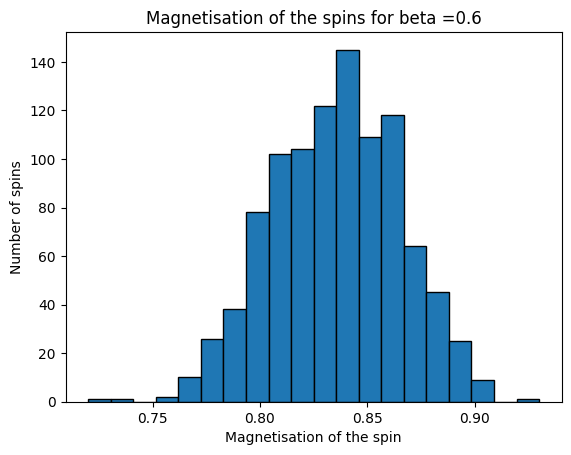

Epoch 0: 49.6256103515625
Epoch 100: -32.11677932739258
Epoch 200: -8.871179580688477
Epoch 300: -7.9999189376831055
Epoch 400: -4.260930061340332
Epoch 500: -2.845501184463501
Epoch 600: -0.13006407022476196
Epoch 700: -0.36487051844596863
Epoch 800: 0.6327236294746399
Epoch 900: 0.28058770298957825


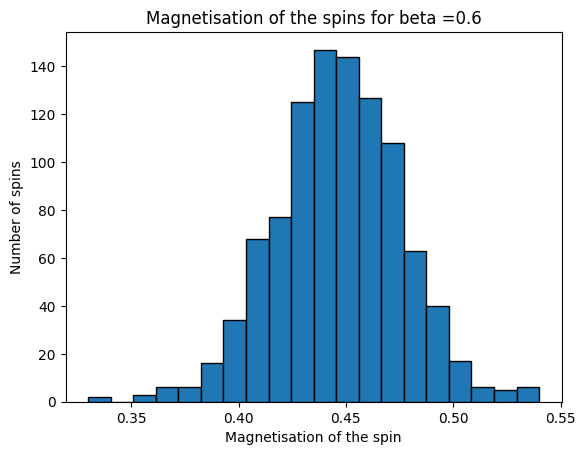

Epoch 0: 18.85255241394043
Epoch 100: -35.166786193847656
Epoch 200: -9.15139389038086
Epoch 300: -15.298613548278809
Epoch 400: -9.174027442932129
Epoch 500: -2.475921154022217
Epoch 600: -4.759253978729248
Epoch 700: -1.0995707511901855
Epoch 800: -0.3300515115261078
Epoch 900: -1.2532271146774292


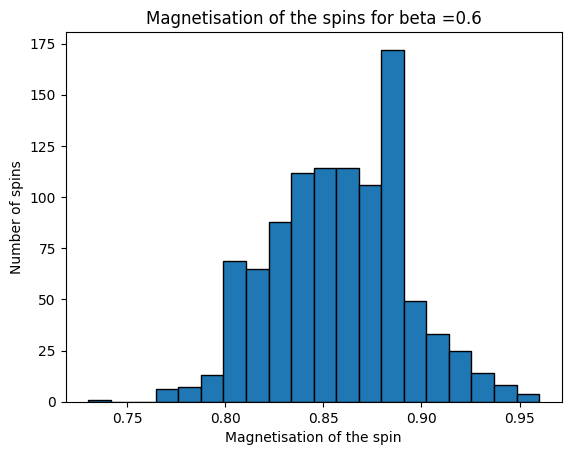

Epoch 0: 27.071367263793945
Epoch 100: -110.46421813964844
Epoch 200: -17.63567352294922
Epoch 300: -7.357757568359375
Epoch 400: -4.159010887145996
Epoch 500: -0.36629989743232727
Epoch 600: -5.751469612121582
Epoch 700: -0.4877101182937622
Epoch 800: -1.1979718208312988
Epoch 900: -6.89369010925293


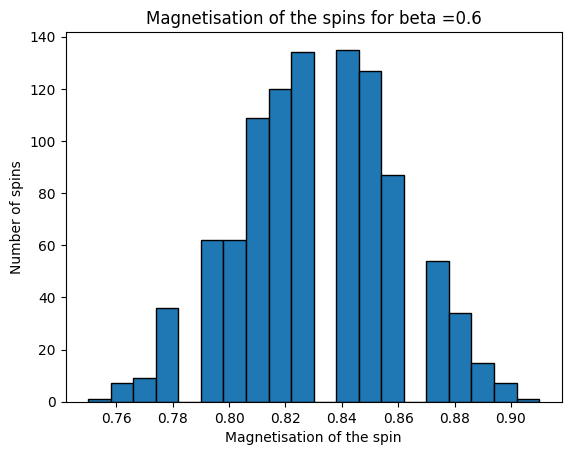

Epoch 0: 22.704980850219727
Epoch 100: -22.419570922851562
Epoch 200: -20.340171813964844
Epoch 300: -10.968719482421875
Epoch 400: -8.52261734008789
Epoch 500: -2.1234285831451416
Epoch 600: -0.05340538173913956
Epoch 700: 0.22684267163276672
Epoch 800: -1.7661347389221191
Epoch 900: -1.4697926044464111


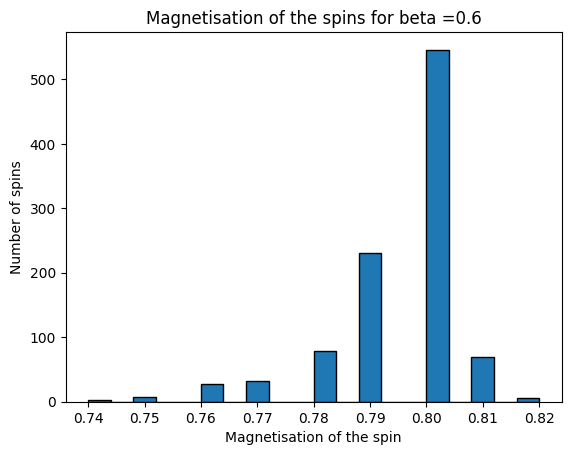

Epoch 0: 34.732078552246094
Epoch 100: -19.95892333984375
Epoch 200: -29.769088745117188
Epoch 300: -11.951491355895996
Epoch 400: -15.824285507202148
Epoch 500: -8.328899383544922
Epoch 600: -11.966447830200195
Epoch 700: -5.573526382446289
Epoch 800: -6.701685905456543
Epoch 900: -6.280876636505127


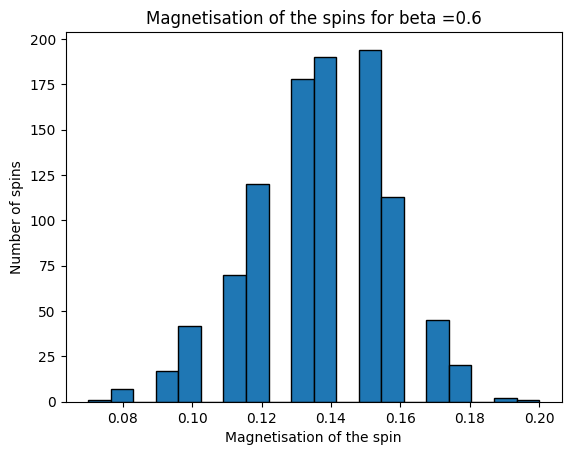

Epoch 0: 45.411094665527344
Epoch 100: -3.817622184753418
Epoch 200: -12.400601387023926
Epoch 300: -0.9982491135597229
Epoch 400: -1.5367213487625122
Epoch 500: -10.805556297302246
Epoch 600: -4.721433639526367
Epoch 700: -4.820219039916992
Epoch 800: 26.746776580810547
Epoch 900: 1.9731067419052124


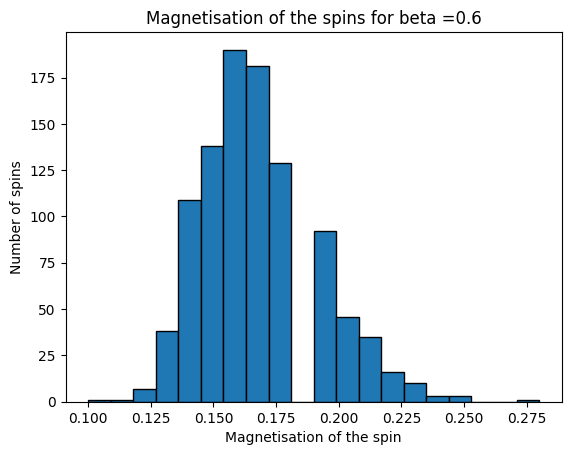

Epoch 0: 64.6532211303711
Epoch 100: -36.1530876159668
Epoch 200: -11.562841415405273
Epoch 300: -4.522942066192627
Epoch 400: -1.1127784252166748
Epoch 500: -3.9192659854888916
Epoch 600: -1.3795082569122314
Epoch 700: -0.46500152349472046
Epoch 800: -2.4959185123443604
Epoch 900: 0.0745297446846962


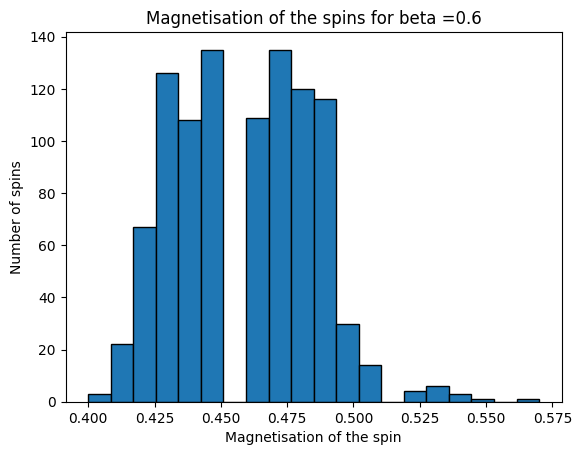

Epoch 0: 47.08560562133789
Epoch 100: -61.586456298828125
Epoch 200: -13.007088661193848
Epoch 300: -4.7952094078063965
Epoch 400: -19.987285614013672
Epoch 500: -10.387068748474121
Epoch 600: -1.4480139017105103
Epoch 700: -0.367502361536026
Epoch 800: -0.7444809675216675
Epoch 900: -0.2732323706150055


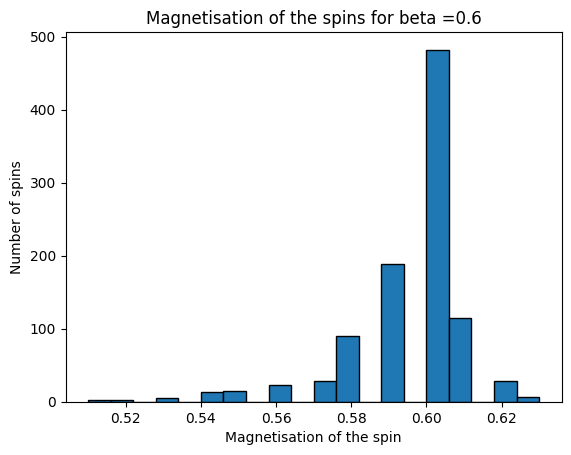

Epoch 0: 47.662628173828125
Epoch 100: -32.13816833496094
Epoch 200: -3.7301812171936035
Epoch 300: -8.176177024841309
Epoch 400: -0.4820629060268402
Epoch 500: -7.206459999084473
Epoch 600: -6.764486312866211
Epoch 700: -0.3205937147140503
Epoch 800: 0.1936742663383484
Epoch 900: -1.257460117340088


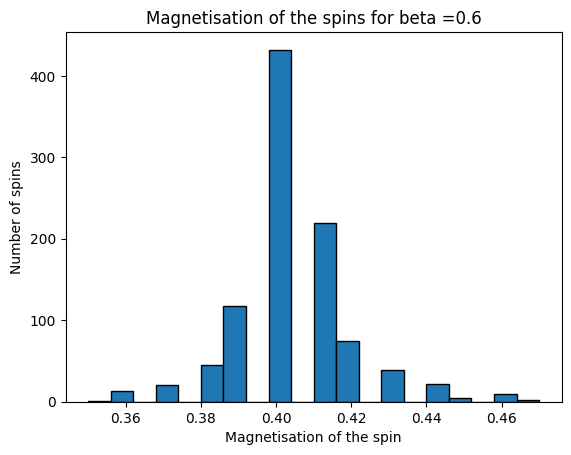

Epoch 0: 2.3896307945251465
Epoch 100: -48.07952117919922
Epoch 200: -9.244239807128906
Epoch 300: -2.0798604488372803
Epoch 400: -1.9216358661651611
Epoch 500: -10.395368576049805
Epoch 600: -9.7933988571167
Epoch 700: -5.849430561065674
Epoch 800: -1.6826753616333008
Epoch 900: -0.9705140590667725


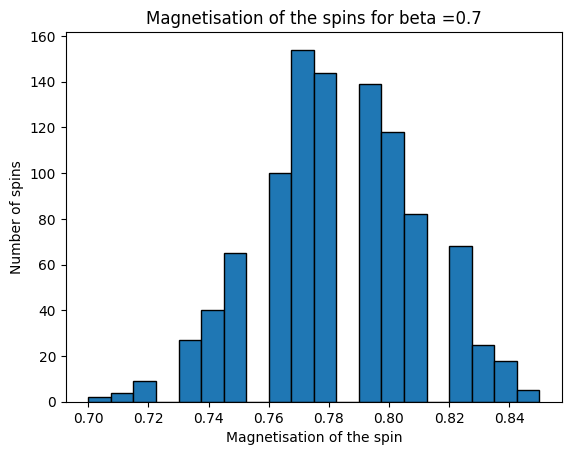

Epoch 0: 28.065114974975586
Epoch 100: -100.23918914794922
Epoch 200: -45.0297737121582
Epoch 300: -7.755859851837158
Epoch 400: -9.356159210205078


KeyboardInterrupt: 

In [2]:


### WITHOUT ANNEALING


betas=[ 0.6, 0.7, 0.8, 0.9, 1, 1.1]

for beta in betas: 
    magnetisations_list=[]

    for i in range(10):
        my_model = VAN(taille)
        losses = train(my_model, lambda x:  log_prob_target_energie(x, beta), batch_size=200, n_iter=1000, lr=0.01)
        mysample=my_model.sample(1000)
        magnetisations=[]
        for spin in mysample:
            magnetisations.append(torch.mean(spin))
        plt.hist(magnetisations, bins=20, edgecolor='black') 
        plt.xlabel('Magnetisation of the spin')
        plt.ylabel('Number of spins')
        plt.title('Magnetisation of the spins for beta =' + str(beta))
        plt.savefig('./figures/magnetisation_for beta= '+str(beta)+ 'test n° ' +str(i) + '.png')
        magnetisations_list.append(magnetisations)
        plt.show()
    pd.DataFrame(magnetisations_list).to_csv('./magnetisations/magnetisations for beta= '+str(beta)+'.csv')


In [ ]:

### WITH ANNEALING

mymodel1 = VAN(taille)

betas=[0.005, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1]

for beta in betas: 
    magnetisations_list=[]
    losses = train(mymodel1, lambda x:  log_prob_target_energie(x, beta), batch_size=200, n_iter=1000, lr=0.01)
    mysample=mymodel1.sample(1000)
    magnetisations=[]
    for spin in mysample:
        magnetisations.append(torch.mean(spin))
    plt.hist(magnetisations, bins=20, edgecolor='black') 
    plt.xlabel('Magnetisation of the spin')
    plt.ylabel('Number of spins')
    plt.title('Magnetisation of the spins for beta =' + str(beta))
    plt.savefig('./figures/magnetisation_test_annealing for beta= '+str(beta)+ '.png')
    magnetisations_list.append(magnetisations)
    plt.show()
    pd.DataFrame(magnetisations_list).to_csv('./magnetisations/magnetisations_test_annealing for beta= '+str(beta)+'.csv')


